In [1]:
import pandas as pd

df = pd.read_csv('../train.csv')
dfo = pd.read_csv('../archive/Churn_Modelling.csv')
dfo.rename(columns={'RowNumber': 'id'}, inplace=True)

new_df = pd.concat([df, dfo])
new_df.to_csv('../new_data.csv', index=False)

#df.head()
dfo.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [2]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
new_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
print(df.Exited.value_counts())
print(dfo.Exited.value_counts())
print(new_df.Exited.value_counts())

Exited
0    130113
1     34921
Name: count, dtype: int64
Exited
0    7964
1    2038
Name: count, dtype: int64
Exited
0    138077
1     36959
Name: count, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


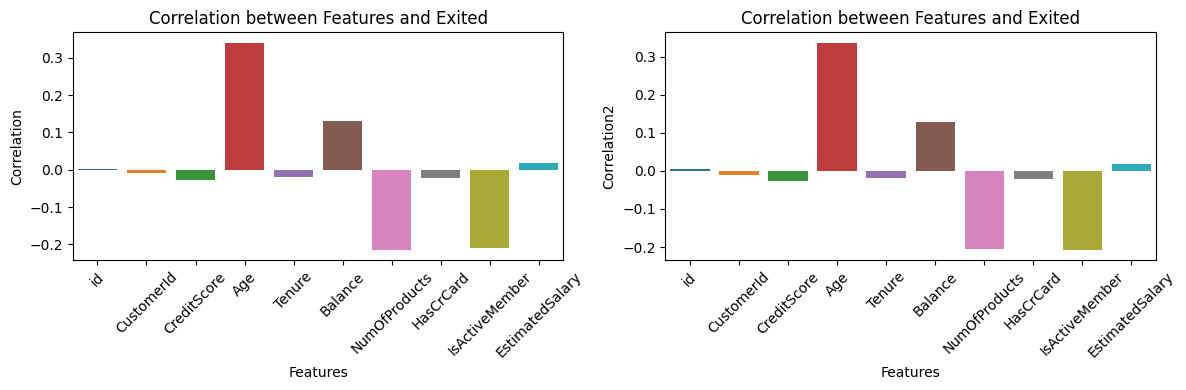

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.select_dtypes(exclude=['object']).corr()['Exited'] 
correlation = correlation.drop('Exited')  

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=correlation.index, y=correlation.values, ax=axes[0]) 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Correlation')
axes[0].set_title('Correlation between Features and Exited')

correlation2 = new_df.select_dtypes(exclude=['object']).corr()['Exited'] 
correlation2 = correlation2.drop('Exited')  

sns.barplot(x=correlation2.index, y=correlation2.values, ax=axes[1]) 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Correlation2')
axes[1].set_title('Correlation between Features and Exited')

plt.tight_layout()
plt.show()
